# Programming assignment 2: KNN classifier

In this programming exercise, we will build a KNN classifier and apply it to a handwritten digit dataset (MNIST). Please download the datasets from Canvas and put them in the same folder of this iPython notebook.

Instructions for submission: please submit the following:
* Completed iPython notebook. We will inspect the code and run your notebook.
* Solutions to the corresponding problems




## 1. The MNIST dataset

`MNIST` is a classic database of handwritten digits that is commonly used for training various image processing systems. The MNIST database contains 60,000 training images and 10,000 testing images. In this notebook we will work with a subset of this data: a training set of 2,000 images and a test set of 500 images. Each image is given by 28 X 28 grayscale pixels.

First, let's first load the dataset check the basic statistics.


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import time
import random
from math import sqrt
from progressbar import ProgressBar

In [3]:
## Load the training set
# To speed up computation, we will just consider 2000 images for training and 500 images for testing
num_trn, num_tst = 2000,500
train_data = np.load('mnist_train_data.npy')[:num_trn,]
train_labels = np.load('mnist_train_labels.npy')[:num_trn]

## Load the testing set
test_data = np.load('mnist_test_data.npy')[:num_tst,]
test_labels = np.load('mnist_test_labels.npy')[:num_tst]


## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))



Training dataset dimensions:  (2000, 784)
Number of training labels:  2000
Testing dataset dimensions:  (500, 784)
Number of testing labels:  500
Training set distribution:
{0: 204, 1: 219, 2: 200, 3: 209, 4: 186, 5: 194, 6: 189, 7: 200, 8: 214, 9: 185}
Test set distribution:
{0: 49, 1: 53, 2: 63, 3: 42, 4: 49, 5: 43, 6: 42, 7: 56, 8: 48, 9: 55}


Now, let's randomly choose 10 images from the training dataset and visualize them.

[358, 1634, 543, 19, 803, 827, 107, 1949, 1315, 108]


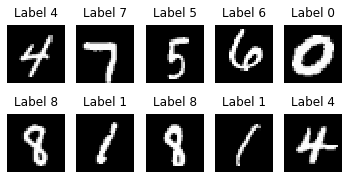

In [4]:
nrows, ncols = 2, 5
index = random.sample(range(len(train_labels)), 10)
print (index)
fig, axes = plt.subplots(nrows, ncols, figsize=(6, 3))
for i in range(nrows):
    for j in range(ncols):
        # Image index
        k = j + i * ncols
        ax = axes[i, j]
        ax.matshow((train_data[index[k],]).reshape((28,28)),cmap=plt.cm.gray)
        ax.set_axis_off()
        ax.set_title("Label " + str(train_labels[index[k]]))

## 2. KNN based on Euclidean distance

Let's first experiment with _Euclidean distance_: for two vectors $x, y \in \mathbb{R}^d$, their Euclidean distance is defined as 
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$
**Task P1:** Complete the following code section to calculate this distance. Copy the corresponding code to the problem set 1 solution pdf file.

In [5]:
## Computes squared Euclidean distance between two vectors.
import numpy as np

def eucl_dist(x,y):
    # input:
    # x, y: vectorization of an image
    # output:
    # the euclidean distance between the two vectors
    
    ### STUDENT: YOUR CODE HERE
    #distance = np.linalg.norm(np.array(x) - np.array(y))
    distance = np.sqrt(np.sum((x-y)**2))
    return distance
    ### CODE ENDS

Now, let's try to compute the distance between some randomly chosen images.

In [6]:
index = random.sample(range(len(train_labels)), 10)
for i in range(5):
    # Image index
    k = i * 2
    print("Distance from "+str(train_labels[index[k]])+" to "+str(train_labels[index[k+1]])+": "+
          str(eucl_dist(train_data[index[k],],train_data[index[k+1],])))

Distance from 4 to 6: 2406.8157
Distance from 5 to 6: 2602.41
Distance from 8 to 4: 2589.247
Distance from 6 to 4: 2119.399
Distance from 0 to 5: 2552.4636


Now, let's implement the K-nearest neighbor classification. 

**Task P2:** Complete the following code sections for `find_KNN` and `KNN_classifier`. Copy the corresponding code to the problem set 1 solution pdf file.

In [7]:
# Take a vector x and returns the indices of its K nearest neighbors in the training set: train_data
import operator
def find_KNN(x, train_data, train_labels, K, dist=eucl_dist):
    # Input: 
    # x: test point
    # train_data: training data X
    # train_labels: training data labels y
    # K: number of nearest neighbors considered
    # dist: default to be the eucl_dist that you have defined above
    # Output:
    # The indices of the K nearest neighbors to test point x in the training set
    
    ##### STUDENT: Your code here #####
    distances = []
    
    for index in range(len(train_data)):
        distance = dist(x, train_data[index])
        distances.append([index, distance, train_labels[index]])
    distances.sort(key=operator.itemgetter(1))
    
    neighbors = []
    
    for i in range(K):
        neighbors.append(distances[i][0])
    
    return neighbors
    
    ##### END OF CODE #####

Now, you should make use of the `find_KKN` function to define the KNN classifier.

In [8]:
# KNN classification
def KNN_classifier(x, train_data, train_labels,K,dist=eucl_dist):
    # Input:
    # x: test point
    # train_data: training data X
    # train_labels: training data labels y
    # K: number of nearest neighbors considered
    # dist: default to be the eucl_dist that you have defined above
    # Output:
    # the predicted label of the test point
    
    ##### STUDENT: Your code here #####
    neighbors = find_KNN(x, train_data, train_labels, K, dist)
    #print(neighbors)
    output_vals = []
    for i in range(len(neighbors)):
        output_vals.append(train_labels[neighbors[i]])
        
    prediction = max(set(output_vals), key=output_vals.count)
    
    return int(prediction)
    ##### END OF CODE #####

Now, let's examine how the code works for 1-NN (i.e., with K=1).

In [9]:
## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    plt.axis('off')
    if(dataset=="train"): 
        plt.imshow((train_data[index,]).reshape((28,28)), cmap=plt.cm.gray)
        label = train_labels[index]
    else:
        plt.imshow((test_data[index,]).reshape((28,28)), cmap=plt.cm.gray)
        label = test_labels[index]
    plt.show()
    print("Label " + str(label))
    return

**Task P3: Find one example of success case and one example of failed case for 1-NN. Print the outputs and copy them to the problem set solution file.**

A success case:
1-NN classification:  9
True label:  9
The test image:


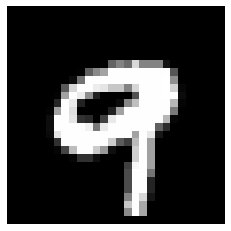

Label 9
The corresponding nearest neighbor image:


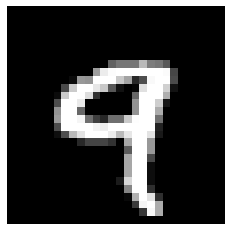

Label 9
A failure case:
1-NN classification:  9
True label:  3
The test image:


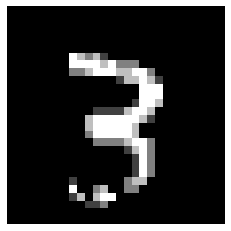

Label 3
The corresponding nearest neighbor image:


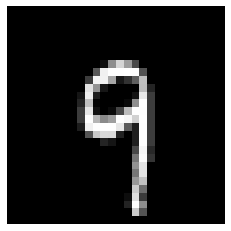

Label 9


In [10]:
## A success case:
ind_success = 4 ### STUDENT: put one index of a success case here

print("A success case:")
print("1-NN classification: ", KNN_classifier(test_data[ind_success,],train_data,train_labels,1,eucl_dist))
#print(len(train_data))
print("True label: ", test_labels[ind_success])
print("The test image:")
vis_image(ind_success, "test")
print("The corresponding nearest neighbor image:")
#print(find_KNN(test_data[ind_success,],train_data,train_labels,1,eucl_dist))
vis_image(find_KNN(test_data[ind_success,],train_data,train_labels,1,eucl_dist)[0], "train")

## A failure case:
ind_fail =  24 ### STUDENT: put one index of a failued case here
print("A failure case:")
print("1-NN classification: ", KNN_classifier(test_data[ind_fail,],train_data,train_labels,1,eucl_dist))
print("True label: ", test_labels[ind_fail])
print("The test image:")
vis_image(ind_fail, "test")
print("The corresponding nearest neighbor image:")
vis_image(find_KNN(test_data[ind_fail,],train_data,train_labels,1,eucl_dist)[0], "train")

Now let's apply our K-nearest neighbor classifier over the full data set with `K=3`. 

Note that to classify each test point, our code takes a full pass over each of the 2000 training examples. The following code takes about 8 seconds on 3.3 GHz Intel Core i. 

**Task P4: Report the outputs of the following code and copy them to the problem set solution file.**

In [11]:
## Predict on each test data point (and time it!)
pbar = ProgressBar() # to show progress
t_before = time.time()
test_predictions = np.zeros(len(test_labels))
for i in pbar(range(len(test_labels))):   
    test_predictions[i] = KNN_classifier(test_data[i,],train_data,train_labels,3,eucl_dist)
t_after = time.time()

## Compute the error
err_positions = np.not_equal(test_predictions, test_labels)
error = float(np.sum(err_positions))/len(test_labels)

print("Error of nearest neighbor classifier with Euclidean distance: ", error)
print("Classification time (seconds) with Euclidean distance: ", t_after - t_before)

100% (500 of 500) |######################| Elapsed Time: 0:00:17 Time:  0:00:17


Error of nearest neighbor classifier with Euclidean distance:  0.074
Classification time (seconds) with Euclidean distance:  17.03899836540222


## 3. Different distance metrics

So far, we have been using the Euclidean distance. In this section, let's try the Manhattan distance. You will also design a distance function and report the results.

Recall that the Manhattan distance (a.k.a. $\ell_1$-norm) is given by:
$$\|x - y\|_1 = {\sum_{i=1}^d |x_i - y_i|}.$$

**Task P5: Complete the definition of `manh_dist` and report the outputs of the following code and copy them to the problem set solution file.**

In [12]:
## Computes Manhattan distance between two vectors.
def manh_dist(x,y):
    # input:
    # x, y: vectorization of an image of size 28 by 28
    # output:
    # the distance between the two vectors
    
    ### STUDENT: YOUR CODE HERE
    #sum = 0
    #for i in range(len(x)):
            #sum += ( abs(x[i] - y[i]) )
    res = np.sum ( np.abs( np.array(x - y) ) )
    return res
    ### CODE ENDS

pbar = ProgressBar() # to show progress
## Predict on each test data point (and time it!)
t_before = time.time()
test_predictions = np.zeros(len(test_labels))
for i in pbar(range(len(test_labels))):   
    test_predictions[i] = KNN_classifier(test_data[i,],train_data,train_labels,3,manh_dist)
    
t_after = time.time()

## Compute the error
err_positions = np.not_equal(test_predictions, test_labels)
error = float(np.sum(err_positions))/len(test_labels)

print("Error of nearest neighbor classifier with Manhattan distance: ", error)
print("Classification time (seconds) with Manhattan distance: ", t_after - t_before)

100% (500 of 500) |######################| Elapsed Time: 0:00:19 Time:  0:00:19


Error of nearest neighbor classifier with Manhattan distance:  0.084
Classification time (seconds) with Manhattan distance:  19.8605477809906


**Task P6: Define your own distance function and write down the mathematical definition. Copy the code and the result to the problem set solution file. (2 bonus point) Can you improve over the Euclidean distance?**

In [13]:
## Compute a distance metric of your design
def my_dist(x,y):
    # input:
    # x, y: vectorization of an image of size 28 by 28 
    # output:
    # the distance between the two vectors
    
    ### STUDENT: YOUR CODE HERE
    distance = np.sqrt( np.sum( ( np.array(x) - np.array(y) )**4 ) )
    return distance
    ### CODE ENDS


In [14]:
pbar = ProgressBar() # to show progress
## Predict on each test data point (and time it!)
t_before = time.time()
test_predictions = np.zeros(len(test_labels))
for i in pbar(range(len(test_labels))):   
    test_predictions[i] = KNN_classifier(test_data[i,],train_data,train_labels,3,my_dist)

t_after = time.time()

## Compute the error
err_positions = np.not_equal(test_predictions, test_labels)
error = float(np.sum(err_positions))/len(test_labels)

print("Error of nearest neighbor classifier with the new distance: ", error)
print("Classification time (seconds) with the new distance: ", t_after - t_before)

100% (500 of 500) |######################| Elapsed Time: 0:00:32 Time:  0:00:32


Error of nearest neighbor classifier with the new distance:  0.066
Classification time (seconds) with the new distance:  32.20482015609741


## 4. Cross-validation to select K

k-Fold Cross Validation (don't confuse this k with the K in KNN!) is a very useful technique to check how well a model performs when we apply it on an independent data. It is often used to flag problems caused by overfitting and selection bias. However, it brings an additional data processing load and time.

<img style="width:500px" src="K-fold-CV.png">

**Task P7: Implement the 5-fold cross validation to choose the best K (number of nearest neighbors) between 1 and 10 for KNN with Euclidean distance. Copy the code in the solution file and plot the 5-fold validation error with respect to K. Also plot the test error on the same figure. What do you observe?**

100% (400 of 400) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (400 of 400) |######################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (400 of 400) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (400 of 400) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (400 of 400) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (400 of 400) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (400 of 400) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (400 of 400) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (400 of 400) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (400 of 400) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (400 of 400) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (400 of 400) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (400 of 400) |#####################

100% (400 of 400) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (400 of 400) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (400 of 400) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (400 of 400) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (400 of 400) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (400 of 400) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (400 of 400) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (400 of 400) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (400 of 400) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (400 of 400) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (400 of 400) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (400 of 400) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (400 of 400) |#####################

100% (500 of 500) |######################| Elapsed Time: 0:00:14 Time:  0:00:14
100% (500 of 500) |######################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (500 of 500) |######################| Elapsed Time: 0:00:18 Time:  0:00:18
100% (500 of 500) |######################| Elapsed Time: 0:00:17 Time:  0:00:17
100% (500 of 500) |######################| Elapsed Time: 0:00:17 Time:  0:00:17
100% (500 of 500) |######################| Elapsed Time: 0:00:18 Time:  0:00:18


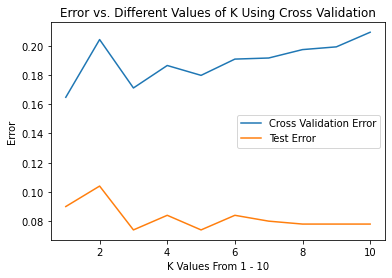

In [36]:
### STUDENT: YOUR CODE HERE
from matplotlib import pyplot as plt

def main():
    folds = 5
    
    #To be used for the plot######################################
    Values_of_K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] #X-axis
    Ks_Averaged_Error = [] #Y-axis
    Test_Error = [] #Y-axis
    ##############################################################
    
    
    K_Error = list()
    Iteration_Error = list()
    folded_data = list()
    folded_labels = list()
    
    my_train_data = list()
    my_train_labels = list()
    my_test_data = list()
    my_test_labels = list()

    folded_data, folded_labels = cross_validation(train_data, train_labels, folds)
    
    
    #Loop for each value of K
    for KNN_K in range(1,11):
    
        #Loop test for each fold while alternating the test_data and train_data and their respective labels
            
        #############################################################
        # ITERATION 1 ###############################################
        #############################################################
        my_test_data = folded_data[0]
        my_test_labels = folded_labels[0]

        my_train_data_1 = folded_data[1]
        my_train_labels_1= folded_labels[1]

        my_train_data_2 = folded_data[2]
        my_train_labels_2= folded_labels[2]

        my_train_data_3 = folded_data[3]
        my_train_labels_3= folded_labels[3]

        my_train_data_4 = folded_data[4]
        my_train_labels_4 = folded_labels[4]

        #############################################################

        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_1, my_train_labels_1, KNN_K, eucl_dist )

        ## Compute the error 1
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_2, my_train_labels_2, KNN_K, eucl_dist )

        ## Compute the error 2
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_3, my_train_labels_3, KNN_K, eucl_dist )

        ## Compute the error 3
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_4, my_train_labels_4, KNN_K, eucl_dist )

        ## Compute the error 4
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        
        #############################################################
        # ITERATION 2 ###############################################
        #############################################################
        my_test_data = folded_data[1]
        my_test_labels = folded_labels[1]

        my_train_data_1 = folded_data[0]
        my_train_labels_1= folded_labels[0]

        my_train_data_2 = folded_data[2]
        my_train_labels_2 = folded_labels[2]

        my_train_data_3 = folded_data[3]
        my_train_labels_3 = folded_labels[3]

        my_train_data_4 = folded_data[4]
        my_train_labels_4 = folded_labels[4]

        #############################################################

         ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_1, my_train_labels_1, KNN_K, eucl_dist )

        ## Compute the error 1
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_2, my_train_labels_2, KNN_K, eucl_dist )

        ## Compute the error 2
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_3, my_train_labels_3, KNN_K, eucl_dist )

        ## Compute the error 3
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_4, my_train_labels_4, KNN_K, eucl_dist )

        ## Compute the error 4
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
                
        
        #############################################################
        # ITERATION 3 ###############################################
        #############################################################
        my_test_data = folded_data[2]
        my_test_labels = folded_labels[2]

        my_train_data_1 = folded_data[0]
        my_train_labels_1= folded_labels[0]

        my_train_data_2 = folded_data[1]
        my_train_labels_2 = folded_labels[1]

        my_train_data_3 = folded_data[3]
        my_train_labels_3 = folded_labels[3]

        my_train_data_4 = folded_data[4]
        my_train_labels_4 = folded_labels[4]

        #############################################################

         ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_1, my_train_labels_1, KNN_K, eucl_dist )

        ## Compute the error 1
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_2, my_train_labels_2, KNN_K, eucl_dist )

        ## Compute the error 2
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_3, my_train_labels_3, KNN_K, eucl_dist )

        ## Compute the error 3
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_4, my_train_labels_4, KNN_K, eucl_dist )

        ## Compute the error 4
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
                
        
        #############################################################
        # ITERATION 4 ###############################################
        #############################################################
        my_test_data = folded_data[3]
        my_test_labels = folded_labels[3]

        my_train_data_1 = folded_data[0]
        my_train_labels_1= folded_labels[0]

        my_train_data_2 = folded_data[1]
        my_train_labels_2 = folded_labels[1]

        my_train_data_3 = folded_data[2]
        my_train_labels_3 = folded_labels[2]

        my_train_data_4 = folded_data[4]
        my_train_labels_4 = folded_labels[4]

        #############################################################

         ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_1, my_train_labels_1, KNN_K, eucl_dist )

        ## Compute the error 1
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_2, my_train_labels_2, KNN_K, eucl_dist )

        ## Compute the error 2
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_3, my_train_labels_3, KNN_K, eucl_dist )

        ## Compute the error 3
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_4, my_train_labels_4, KNN_K, eucl_dist )

        ## Compute the error 4
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        
        #############################################################
        # ITERATION 5 ###############################################
        #############################################################
        my_test_data = folded_data[4]
        my_test_labels = folded_labels[4]

        my_train_data_1 = folded_data[0]
        my_train_labels_1= folded_labels[0]

        my_train_data_2 = folded_data[1]
        my_train_labels_2 = folded_labels[1]

        my_train_data_3 = folded_data[2]
        my_train_labels_3 = folded_labels[2]

        my_train_data_4 = folded_data[3]
        my_train_labels_4 = folded_labels[3]

        #############################################################

         ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_1, my_train_labels_1, KNN_K, eucl_dist )

        ## Compute the error 1
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_2, my_train_labels_2, KNN_K, eucl_dist )

        ## Compute the error 2
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_3, my_train_labels_3, KNN_K, eucl_dist )

        ## Compute the error 3
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        ## Predict on each test data point (and time it!)
        pbar = ProgressBar() # to show progress
        test_predictions = np.zeros(len(my_test_labels))
        for i in pbar(range(len(my_test_labels))):   
            test_predictions[i] = KNN_classifier( my_test_data[i,], my_train_data_4, my_train_labels_4, KNN_K, eucl_dist )

        ## Compute the error 4
        err_positions = np.not_equal(test_predictions, my_test_labels)
        error = float(np.sum(err_positions))/len(my_test_labels)
        
        K_Error.append(error)
        
        
        
        #Get the average error between all the errors calculated during the fold iterations
        Ks_Averaged_Error.append( Average_Error( K_Error ) )
        K_Error = []
        
    
    #Do the same for test error###############################################
    ## Predict on each test data point (and time it!)
    
    #Loop for each value of K
    for KNN_K in range(1,11):
        
        pbar = ProgressBar() # to show progress
        t_before = time.time()
        test_predictions = np.zeros(len(test_labels))
        for i in pbar(range(len(test_labels))):   
            test_predictions[i] = KNN_classifier(test_data[i,], train_data, train_labels, KNN_K, eucl_dist)
        t_after = time.time()

        ## Compute the error
        err_positions = np.not_equal(test_predictions, test_labels)
        error = float(np.sum(err_positions))/len(test_labels)

        Test_Error.append(error)
    
    
    
    ###########################################################################    
    ####### Now we plot the resutls ###########################################    
    ##########################################################################

    #print("These were the results of 5-fold cross validation for K values 1-10:", Ks_Averaged_Error)
    plt.title("Error vs. Different Values of K Using Cross Validation")
    plt.xlabel("K Values From 1 - 10")
    plt.ylabel("Error")
    plt.plot(Values_of_K, Ks_Averaged_Error, label = "Cross Validation Error")
    plt.plot(Values_of_K, Test_Error, label = "Test Error")
    plt.legend()
    plt.show()


def cross_validation(dataset, labels, folds = 5):
    
    dataset_split = list()
    label_split = list()
    
#     dataset_copy = list(dataset)
#     label_copy  = list(labels)
    
    fold_size = int(len(dataset) / folds )
    
    dataset_1 = dataset[0: (fold_size)]
    dataset_2 = dataset[fold_size : (2*fold_size)]
    dataset_3 = dataset[(2*fold_size) : (3*fold_size)]
    dataset_4 = dataset[(3*fold_size) : (4*fold_size)]
    dataset_5 = dataset[(4*fold_size) : (5*fold_size)]
    
    labelset_1 = labels[0 : (fold_size)]
    labelset_2 = labels[fold_size : (2*fold_size)]
    labelset_3 = labels[(2*fold_size) : (3*fold_size)]
    labelset_4 = labels[(3*fold_size) : (4*fold_size)]
    labelset_5 = labels[(4*fold_size) : (5*fold_size)]
    
    dataset_split.append(dataset_1)
    dataset_split.append(dataset_2)
    dataset_split.append(dataset_3)
    dataset_split.append(dataset_4)
    dataset_split.append(dataset_5)
    
    label_split.append(labelset_1)
    label_split.append(labelset_2)
    label_split.append(labelset_3)
    label_split.append(labelset_4)
    label_split.append(labelset_5)
    
    return dataset_split, label_split
 
def Average_Error(List): 
    return sum(List) / len(List) 

if __name__=="__main__": 
    main() 

Congratulations! You have just implemented the KNN algorithm and tested it on the MNIST dataset!

In [ ]:
#     print("The number of folded data:", len(folded_data))
#     print("The number of folded labels:", len(folded_labels))
    
#     print("1st dataset fold contains data size of:", len(folded_data[0]))
#     print("1st label fold contains data size of:", len(folded_labels[0]))
    
#     print("2nd dataset fold contains data size of:", len(folded_data[1]))
#     print("2nd label fold contains data size of:", len(folded_labels[1]))
    
#     print("3rd dataset fold contains data size of:", len(folded_data[2]))
#     print("3rd label fold contains data size of:", len(folded_labels[2]))
    
#     print("4th dataset fold contains data size of:", len(folded_data[3]))
#     print("4th label fold contains data size of:", len(folded_labels[3]))
    
#     print("5th dataset fold contains data size of:", len(folded_data[4]))
#     print("5th label fold contains data size of:", len(folded_labels[4]))